In [ ]:
"""
Shoutouts to these notebooks which helped me create this notebook
CREDITS: 
https://www.kaggle.com/code/kenjee/housing-prices-example-with-video-walkthrough
https://www.kaggle.com/code/serigne/stacked-regressions-top-4-on-leaderboard
"""

In [75]:
import os
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
from scipy import stats

In [76]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

In [77]:
train_df.info()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [78]:
custom_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a", "#a6cee3", "#b2df8a", "#fb9a99", "#fdbf6f", "#cab2d6"]
sns.set(style="darkgrid", palette =custom_palette, color_codes=True)
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.facecolor'] = '#1a1a1a'
plt.rcParams['grid.color'] = '#444444'    
plt.rcParams['grid.linestyle'] = '--'

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74160.16474519415, 180921.19589041095, 0.9319665641512986))

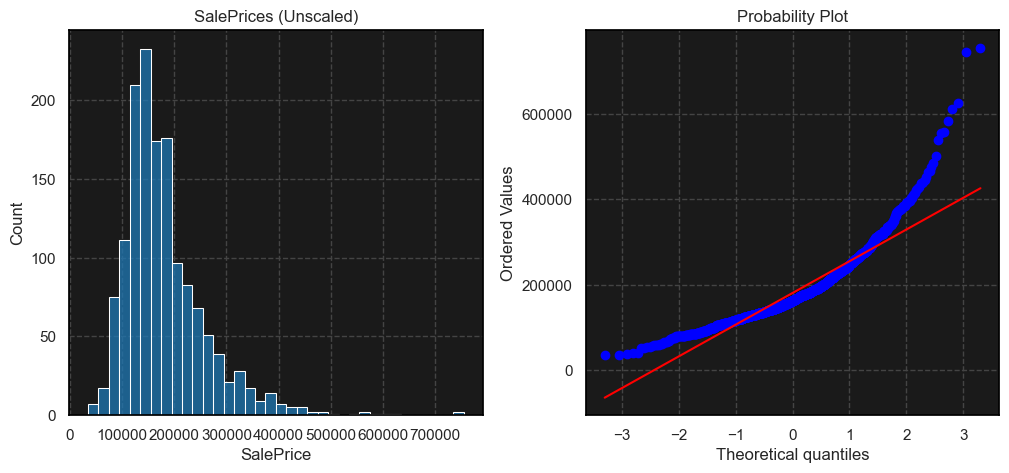

In [79]:
fig, axs = plt.subplots(1,2, figsize=(12, 5))
plt.subplots_adjust(wspace=0.25)
sns.histplot(data=train_df, x="SalePrice", ax=axs[0], binwidth=20000).set_title('SalePrices (Unscaled)')
stats.probplot(train_df['SalePrice'], plot=axs[1], fit=True, dist="norm")

Text(0.5, 1.0, 'Quality vs. SalePrice (w/o outliers)')

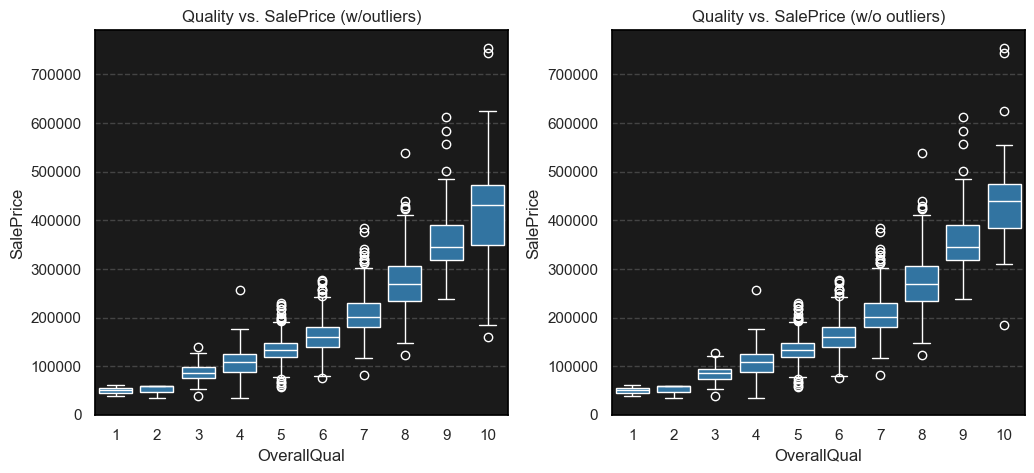

In [80]:
# drop some outliers
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
plt.subplots_adjust(wspace=0.25)
sns.boxplot(ax=axs[0], data=train_df, x="OverallQual", y="SalePrice", linecolor='white').set_title('Quality vs. SalePrice (w/outliers)')
train_df = train_df.drop(train_df[(train_df["OverallQual"]==10) 
                         & (train_df["SalePrice"]<170000)].index)
train_df = train_df.drop(train_df[(train_df["OverallQual"]==3) 
                         & (train_df["SalePrice"]>130000)].index)
sns.boxplot(ax=axs[1], data=train_df, x="OverallQual", y="SalePrice", linecolor='white').set_title('Quality vs. SalePrice (w/o outliers)')

In [81]:
train_df["Num_Bathrooms"] = (train_df['FullBath'] 
                               + (0.5 * train_df['HalfBath']) 
                               + train_df['BsmtFullBath'] 
                               + (0.5 * train_df['BsmtHalfBath'])
                              )
train_df['Num_Porches'] = (train_df['OpenPorchSF'] 
                              + train_df['3SsnPorch'] 
                              + train_df['EnclosedPorch'] 
                              + train_df['ScreenPorch'] 
                              + train_df['WoodDeckSF']
                             )
test_df["Num_Bathrooms"] = (test_df['FullBath'] 
                               + (0.5 * test_df['HalfBath']) 
                               + test_df['BsmtFullBath'] 
                               + (0.5 * test_df['BsmtHalfBath'])
                              )
test_df['Num_Porches'] = (test_df['OpenPorchSF'] 
                              + test_df['3SsnPorch'] 
                              + test_df['EnclosedPorch'] 
                              + test_df['ScreenPorch'] 
                              + test_df['WoodDeckSF']
                             )
train_df["Property_Age"] = (train_df['YrSold']-train_df['YearBuilt'])
test_df["Property_Age"] = (test_df['YrSold']-test_df['YearBuilt'])
train_df['TotalSF'] = (train_df['TotalBsmtSF'] + train_df['1stFlrSF'] + train_df['2ndFlrSF'])
test_df['TotalSF'] = (test_df['TotalBsmtSF'] + test_df['1stFlrSF'] + test_df['2ndFlrSF'])

train_df['YrSold_cat'] = train_df['YrSold'].astype(object)
train_df['MoSold_cat'] = train_df['MoSold'].astype(object)
train_df['YearBuilt_cat'] = train_df['YearBuilt'].astype(object)
train_df['MSSubClass_cat'] = train_df['MSSubClass'].astype(object)
test_df['YrSold_cat'] = test_df['YrSold'].astype(object)
test_df['MoSold_cat'] = test_df['MoSold'].astype(object)
test_df['YearBuilt_cat'] = test_df['YearBuilt'].astype(object)
test_df['MSSubClass_cat'] = test_df['MSSubClass'].astype(object)

<Axes: xlabel='MSZoning', ylabel='SalePrice'>

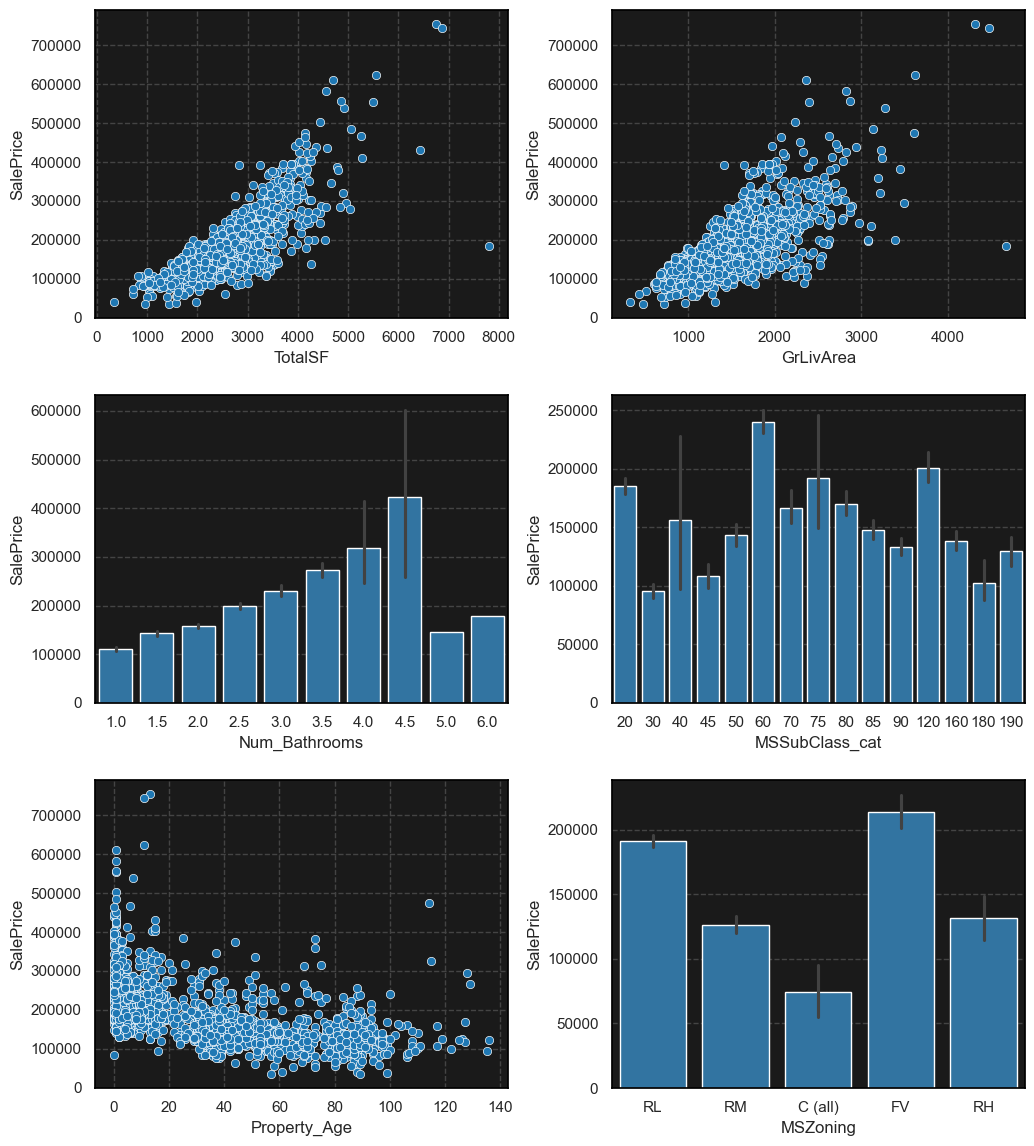

In [82]:
fig, axs = plt.subplots(3, 2, figsize=[12,14])
plt.subplots_adjust(wspace=0.25, hspace=0.25)
sns.scatterplot(data=train_df, x='TotalSF', y='SalePrice', ax=axs[0][0])
sns.scatterplot(data=train_df, x='GrLivArea', y='SalePrice', ax=axs[0][1])
sns.barplot(data=train_df, x='MSSubClass_cat', y='SalePrice', ax=axs[1][1])
sns.barplot(data=train_df, x='Num_Bathrooms', y='SalePrice', ax=axs[1][0])
sns.scatterplot(data=train_df, x='Property_Age', y='SalePrice', ax=axs[2][0])
sns.barplot(data=train_df, x='MSZoning', y='SalePrice', ax=axs[2][1])

Text(0.5, 1.0, 'SalePrices (logscale)')

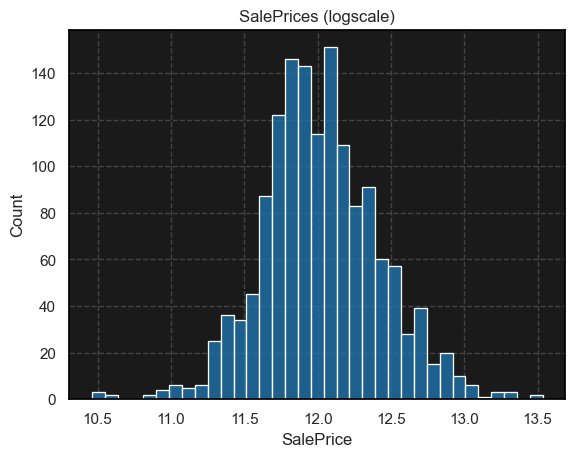

In [83]:
train_df["SalePrice"] = np.log1p(train_df["SalePrice"])
sns.histplot(data=train_df, x="SalePrice").set_title('SalePrices (logscale)')

In [84]:
# seperate out the int features for both the training and final test sets
train_int_features = train_df.select_dtypes(include=['int64', 'float64'])
test_int_features = test_df.select_dtypes(include=['int64', 'float64'])
train_obj_features = train_df.select_dtypes(include=['object', 'category'])
test_obj_features = test_df.select_dtypes(include=['object', 'category'])

In [85]:
corr_matrix = train_int_features.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.820416
TotalSF          0.813780
GrLivArea        0.717031
GarageCars       0.680836
Num_Bathrooms    0.675170
GarageArea       0.655627
TotalBsmtSF      0.643568
1stFlrSF         0.616479
FullBath         0.595364
YearBuilt        0.586890
YearRemodAdd     0.565936
GarageYrBlt      0.541383
TotRmsAbvGrd     0.537232
Fireplaces       0.492311
MasVnrArea       0.433165
Num_Porches      0.398981
BsmtFinSF1       0.390508
LotFrontage      0.372421
WoodDeckSF       0.334167
OpenPorchSF      0.322699
2ndFlrSF         0.319457
HalfBath         0.314084
LotArea          0.260389
BsmtFullBath     0.237010
BsmtUnfSF        0.221723
BedroomAbvGr     0.209634
ScreenPorch      0.121121
PoolArea         0.074310
MoSold           0.057234
3SsnPorch        0.054861
BsmtFinSF2       0.004724
BsmtHalfBath    -0.005240
Id              -0.017634
MiscVal         -0.020055
YrSold          -0.036994
OverallCond     -0.037072
LowQualFinSF    -0.038011
MSSubClass  

In [86]:
train_int_features = train_int_features.drop(columns=['GarageArea', 'Id', 'SalePrice'], axis=1)
test_int_features = test_int_features.drop(columns=['GarageArea', 'Id',], axis=1)

train_obj_features = train_obj_features.drop(columns=['Alley', 'PoolQC', 'MiscFeature', 
                                              'Fence', 'MasVnrType', 'FireplaceQu', 'Utilities', 'Street'], axis=1)
test_obj_features = test_obj_features.drop(columns=['Alley', 'PoolQC', 'MiscFeature', 
                                              'Fence', 'MasVnrType', 'FireplaceQu', 'Utilities', 'Street'], axis=1)

In [87]:
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from scipy.stats import boxcox

train_skews = train_int_features.apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = train_skews[abs(train_skews) > 0.5]
skew_index = high_skew.index

lam = 0.15
for i in skew_index:
    train_int_features[i] = boxcox1p(train_int_features[i], lam)
    test_int_features[i] = boxcox1p(test_int_features[i], lam)

In [88]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

categorical_columns = train_obj_features.columns
numerical_columns = train_int_features.columns

train = pd.concat([train_obj_features, train_int_features], axis=1)
test = pd.concat([test_obj_features, test_int_features], axis=1)
full_df = pd.concat([train, test], axis=0)

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ], remainder = 'passthrough')

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)])

full_preprocessed = pipeline.fit_transform(full_df)
train_preprocessed = full_preprocessed[:1458,:]
test_preprocessed = full_preprocessed[1458:,:]

In [89]:
from sklearn.model_selection import train_test_split

train_labels = train_df["SalePrice"].copy()
X_train, X_test, y_train, y_test = train_test_split(train_preprocessed, train_labels, test_size=0.2, random_state=792)

In [90]:
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

models = {
    'XGBoost': XGBRegressor(random_state=420),
    'Lasso': Lasso(random_state=420),
    'Ridge': Ridge(random_state=420),
    'GBR': GradientBoostingRegressor(random_state=420)
}

param_grids = {
    'XGBoost' : {
        'n_estimators': [100, 250, 500, 1000, 2000, 4000, 8000],
        'learning_rate': [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001],
        'max_depth': [3, 6, 10, 12]
    },
    'Lasso' : {
        'alpha': [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001],
        'tol': [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]
    },
    'Ridge': {
        'alpha': [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001],
        'tol': [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]
    },
    'GBR': {
        'n_estimators': [100, 250, 500, 1000, 2000, 4000, 8000],
        'learning_rate': [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001],
        'max_depth': [3, 6, 10, 12]
    }
}

In [91]:
"""
cv = KFold(n_splits=4, shuffle=True, random_state=42)
grids = {}
for model_name, model in models.items():
    grids[model_name] = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grids[model_name].fit(X_train, y_train)
    best_params = grids[model_name].best_params_
    best_score = np.sqrt(-1 * grids[model_name].best_score_)
    print(f'Best parameters for {model_name}: {best_params}')
    print(f'Best RMSE for {model_name}: {best_score}\n')
"""

"\ncv = KFold(n_splits=4, shuffle=True, random_state=42)\ngrids = {}\nfor model_name, model in models.items():\n    grids[model_name] = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)\n    grids[model_name].fit(X_train, y_train)\n    best_params = grids[model_name].best_params_\n    best_score = np.sqrt(-1 * grids[model_name].best_score_)\n    print(f'Best parameters for {model_name}: {best_params}')\n    print(f'Best RMSE for {model_name}: {best_score}\n')\n"

In [92]:
from sklearn.metrics import mean_squared_error

def show_results(predictions, title):
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    print(f"RMSE: {rmse}")
    plt.scatter(predictions, y_test, c="black", edgecolors="white", label="Validation Data")
    plt.title(title)
    plt.xlabel("Predicted Values")
    plt.ylabel("Real Values")
    plt.plot([10, 14], [10, 14], c= "red")
    plt.show()

RMSE: 0.10987535848684211


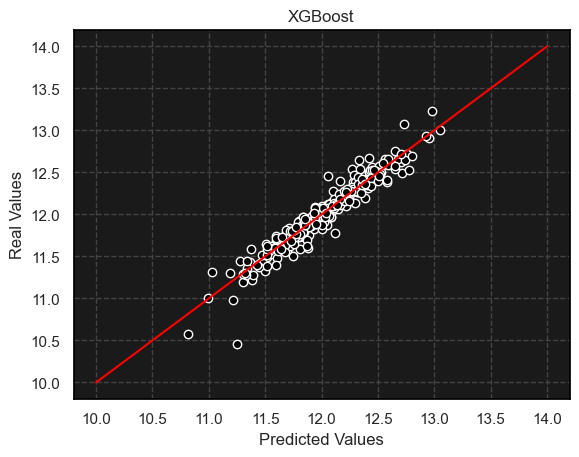

In [93]:
xgb_model = XGBRegressor(random_state=420, n_estimators=2000, learning_rate=0.005, max_depth=3, objective="reg:squarederror")
xgb_model.fit(X_train, y_train, verbose=False)
xgb_predictions = xgb_model.predict(X_test)
show_results(xgb_predictions, "XGBoost")

RMSE: 0.09658214940041697


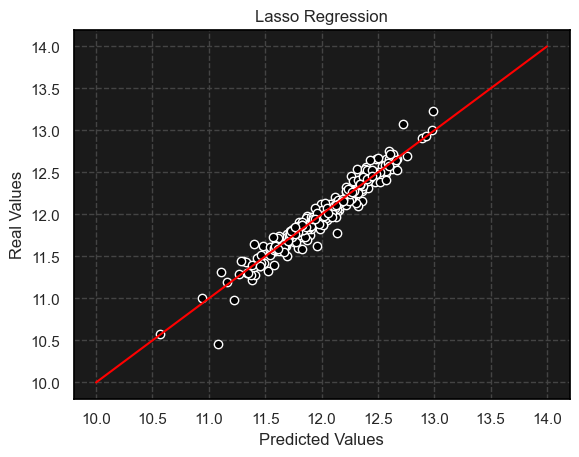

In [94]:
lasso = Lasso(alpha =0.001, random_state=420, tol=0.001)
lasso.fit(X_train, y_train)
lasso_predictions = lasso.predict(X_test)
show_results(lasso_predictions, "Lasso Regression")

RMSE: 0.10936687620718642


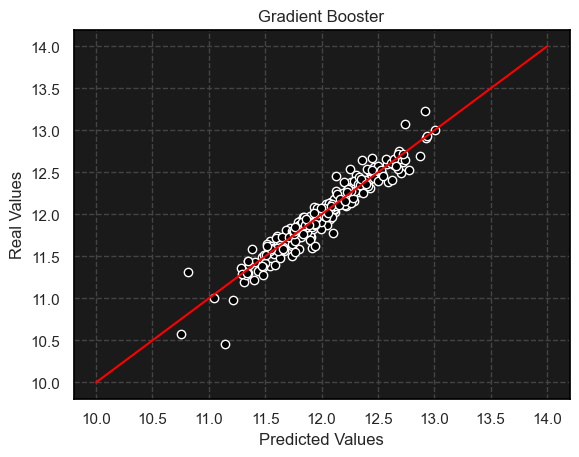

In [95]:
gbr = GradientBoostingRegressor(random_state=420, n_estimators=4000, learning_rate=0.005, loss="huber", max_depth=3)
gbr.fit(X_train, y_train)
gbr_predictions = gbr.predict(X_test)
show_results(gbr_predictions, "Gradient Booster")

RMSE: 0.11573218629505069


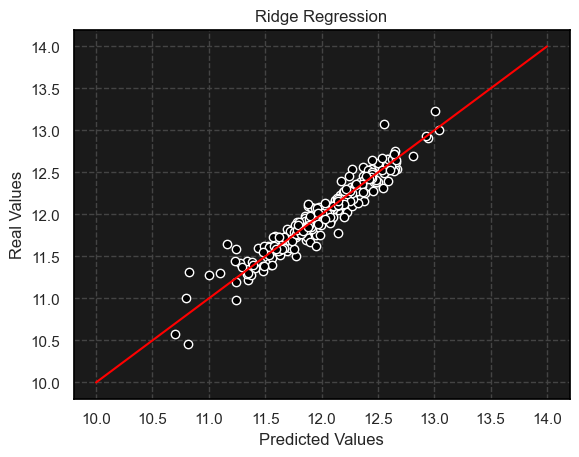

In [96]:
ridge = Ridge(alpha=0.1, random_state=420, tol=0.1)
ridge.fit(X_train, y_train)
ridge_predictions = ridge.predict(X_test)
show_results(ridge_predictions, "Ridge Regression")

In [97]:
"""
from sklearn.ensemble import StackingRegressor

models = {
    'XGBoost': xgb_model,
    'Lasso': lasso,
    'Ridge': ridge,
    'GBR': gbr
}

best_estimators = [model_name for model_name in models.items()]

meta_models = {
    'Stk_Lasso': Lasso(random_state=420),
    'Stk_XGB': XGBRegressor(random_state=420),
    'Stk_Ridge': Ridge(random_state=420)
}

meta_param_grids = {
    'Stk_Lasso': {
        'final_estimator__alpha': [0.005, 0.001, 0.0005],
        'final_estimator__tol': [0.005, 0.001, 0.0005]
    },
    'Stk_XGB': {
        'final_estimator__n_estimators': [1000, 2000, 3000, 4000],
        'final_estimator__learning_rate': [0.01, 0.005, 0.001],
        'final_estimator__max_depth': [3, 6, 10]
    },
    'Stk_Ridge': {
        'final_estimator__alpha': [0.1, 0.05, 0.01],
        'final_estimator__tol': [0.1, 0.05, 0.01]
    }
}

cv = KFold(n_splits=3, shuffle=True, random_state=42)

best_score = np.Inf
best_model = None

for meta_name, meta_model in meta_models.items():
    print(f'Training and tuning {meta_name} as the meta-model...')
    stacking_regressor = StackingRegressor(estimators=best_estimators, final_estimator=meta_model, cv=cv)
    grid_search = GridSearchCV(estimator=stacking_regressor, param_grid=meta_param_grids[meta_name], cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_rmse = np.sqrt(-1 * grid_search.best_score_)
    
    print(f'Best parameters for {meta_name}: {best_params}')
    print(f'Best RMSE for {meta_name}: {best_rmse}\n')
    
    if best_rmse < best_score:
        best_score = best_rmse
        best_model = grid_search
"""

"\nfrom sklearn.ensemble import StackingRegressor\n\nmodels = {\n    'XGBoost': xgb_model,\n    'Lasso': lasso,\n    'Ridge': ridge,\n    'GBR': gbr\n}\n\nbest_estimators = [model_name for model_name in models.items()]\n\nmeta_models = {\n    'Stk_Lasso': Lasso(random_state=420),\n    'Stk_XGB': XGBRegressor(random_state=420),\n    'Stk_Ridge': Ridge(random_state=420)\n}\n\nmeta_param_grids = {\n    'Stk_Lasso': {\n        'final_estimator__alpha': [0.005, 0.001, 0.0005],\n        'final_estimator__tol': [0.005, 0.001, 0.0005]\n    },\n    'Stk_XGB': {\n        'final_estimator__n_estimators': [1000, 2000, 3000, 4000],\n        'final_estimator__learning_rate': [0.01, 0.005, 0.001],\n        'final_estimator__max_depth': [3, 6, 10]\n    },\n    'Stk_Ridge': {\n        'final_estimator__alpha': [0.1, 0.05, 0.01],\n        'final_estimator__tol': [0.1, 0.05, 0.01]\n    }\n}\n\ncv = KFold(n_splits=3, shuffle=True, random_state=42)\n\nbest_score = np.Inf\nbest_model = None\n\nfor meta_name

In [98]:
"""
import pickle
with open('stack_model.pkl','wb') as f:
    pickle.dump(best_model,f)
"""

"\nimport pickle\nwith open('stack_model.pkl','wb') as f:\n    pickle.dump(best_model,f)\n"

RMSE: 0.09515499521678591


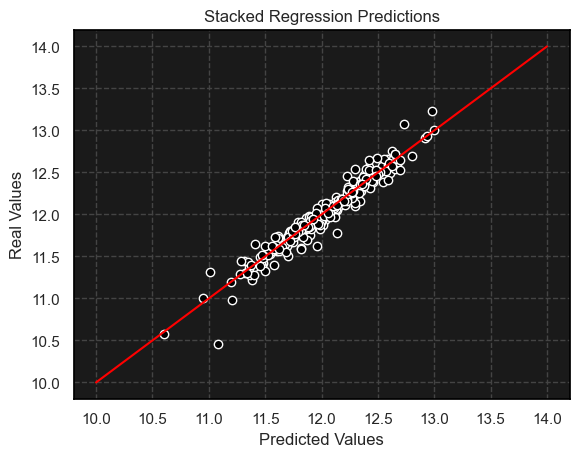

In [99]:
with open('stack_model.pkl', 'rb') as f:
    stacked_model = pickle.load(f)

stacked_predictions = stacked_model.predict(X_test)
show_results(stacked_predictions, "Stacked Regression Predictions")

RMSE: 0.09510505050484122


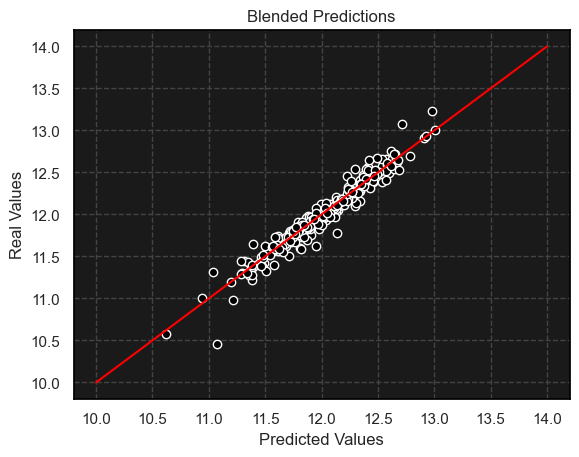

In [100]:
num_preds = len(list(y_test))
blended_predictions = np.zeros((num_preds,))
for i in range(num_preds):
    blended_predictions[i] = (0.1*xgb_predictions[i]) + \
                             (0.1*ridge_predictions[i]) + \
                             (0.5*lasso_predictions[i]) + \
                             (0.05*gbr_predictions[i]) + (0.25*stacked_predictions[i])
show_results(blended_predictions, "Blended Predictions")

In [105]:
final_predictions = np.zeros((1459,))
print(test_preprocessed.shape)
xgb_final = xgb_model.predict(test_preprocessed)
lasso_final = lasso.predict(test_preprocessed)
ridge_final = ridge.predict(test_preprocessed)
gbr_final = gbr.predict(test_preprocessed)
stacked_final = stacked_model.predict(test_preprocessed)

for i in range(1459):
    final_predictions[i] = (0*xgb_final[i]) + \
                           (0*lasso_final[i]) + \
                           (0*ridge_final[i]) + \
                           (0*gbr_final[i]) + (0.8*stacked_final[i])
    final_predictions[i] = np.expm1(final_predictions[i])

(1459, 431)


In [106]:
# competition output
keys = range(1461, 1461 + len(final_predictions))
final_df = pd.DataFrame({'Id': keys, 'SalePrice': final_predictions})
final_df.to_csv("submission.csv", index=False)